<a href="https://colab.research.google.com/github/Esmtra/Computational_Intelligence-Optimization-Image_Classifiers-/blob/main/Milestone_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Team Names**

Eslam Sayed Rady                                                                   1902236  
Mohamed Hussein Adel                                                        1802683

Abdelrahman Adel Saeed                                                     1805626



***   Over View   ***

It's a major task for Computational Intelligence course 2022

Second milestone : The aim of this project is to create and train a multilayer Neural Network to
classify an image into its corresponding category.


# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# Model Configuration


In [ ]:
BATCH_SIZE = 50
IMG_WIDTH, IMG_HEIGHT, IMG_NUM_CHANNELS = 32, 32, 3
LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy()
NUM_CLASSES = 10
NUM_EPOCHS = 100
OPTIMIZER = optimizers.Adam()
VALIDATION_SPLIT = 0.2
VERBOSITY = 1


# Load CIFAR-10 data


In [ ]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()


# Determine shape of the data

In [ ]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_NUM_CHANNELS)


# Parse numbers as floats


In [ ]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')


# Normalize data


In [ ]:
input_train = input_train / 255
input_test = input_test / 255

# Create the model


In [ ]:
model = Sequential()

# First convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# First max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters, a kernel size of (3, 3), and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Second max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters, a kernel size of (3, 3), and ReLU activation
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Third max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer reshape the output to 1-D array
model.add(Flatten())

# First fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Second fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with NUM_CLASSES neurons and softmax activation
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model

In [ ]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=['accuracy'])


# Fit data to model

In [ ]:
history = model.fit(input_train, target_train,
            batch_size=BATCH_SIZE,
            epochs=NUM_EPOCHS,
            verbose=VERBOSITY,
            validation_split=VALIDATION_SPLIT)

Epoch 1/100
800/800 [==============================] - 66s 81ms/step - loss: 1.6018 - accuracy: 0.4065 - val_loss: 1.3212 - val_accuracy: 0.5197
Epoch 2/100
800/800 [==============================] - 65s 81ms/step - loss: 1.2082 - accuracy: 0.5687 - val_loss: 1.1219 - val_accuracy: 0.6097
Epoch 3/100
800/800 [==============================] - 63s 79ms/step - loss: 1.0333 - accuracy: 0.6352 - val_loss: 1.0059 - val_accuracy: 0.6482
Epoch 4/100
800/800 [==============================] - 64s 80ms/step - loss: 0.9122 - accuracy: 0.6790 - val_loss: 0.9253 - val_accuracy: 0.6808
Epoch 5/100
800/800 [==============================] - 65s 81ms/step - loss: 0.8152 - accuracy: 0.7122 - val_loss: 0.9064 - val_accuracy: 0.6874
Epoch 6/100
800/800 [==============================] - 64s 79ms/step - loss: 0.7445 - accuracy: 0.7372 - val_loss: 0.9089 - val_accuracy: 0.6871
Epoch 7/100
800/800 [==============================] - 63s 79ms/step - loss: 0.6722 - accuracy: 0.7663 - val_loss: 0.8922 - val_ac

# Generate generalization metrics

In [ ]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]:.4f} / Test accuracy: {score[1]:.4f}')


Test loss: 3.1205 / Test accuracy: 0.6879


# Visualize history

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

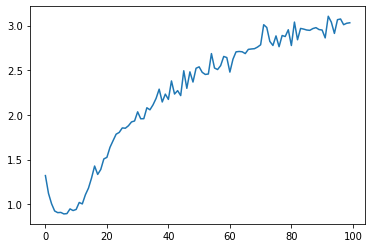

In [ ]:

# Plot history: Loss
plt.plot(history.history['val_loss'])
plt
